<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"></ul></div>

In [1]:
import numpy as np, matplotlib.pyplot as plt, matplotlib as mpl, seaborn as sns
import behalf
from datetime import datetime, timedelta
%matplotlib inline

In [2]:
from matplotlib import animation, rc
rc('animation', html='jshtml')

In [5]:
data = np.loadtxt('../results/merger_576-12_2000_5000_50/step_0.dat')
pos = data[:,:3]
vel = data[:,3:]
m = np.ones(pos.shape[0]) * (1e5 / 1000)

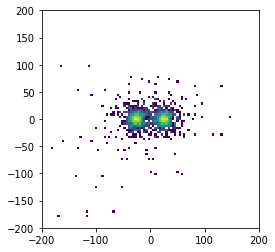

In [6]:
fig, ax = plt.subplots()
ax.set_aspect('equal')
ax.set_xlim((-200, 200))
ax.set_ylim((-200, 200))
data, x, y = np.histogram2d(pos[:,0], pos[:,1], bins=np.linspace(-200, 200, 100))
im = plt.imshow(data.T, interpolation = 'None', origin = 'lower', norm=mpl.colors.LogNorm(), extent=(-200, 200, -200, 200))

In [7]:
t_start = datetime(year=2018, month=5, day=9, hour=8, minute=15)

In [8]:
#Define animation. 
def animate(i) :
    dt = 0.02
    T = i * dt
    X = pos[:,0] + vel[:,0] * T
    Y = pos[:,1] + vel[:,1] * T
    data,x,y = np.histogram2d(X, Y, bins=np.linspace(-200, 200, 100))
    im.set_data(data.T)
    est_time = t_start + timedelta(seconds=28.*i)
    ax.set_title('{:d} Steps, {:.2f} Myr, {:s}'.format(i, T, str(est_time)))
    return im

In [9]:
# call the animator.
anim = animation.FuncAnimation(fig, animate,
                               frames=np.arange(0, 5000, 100), interval=100, blit=False)
anim

In [10]:
data = np.loadtxt('../results/merger_576-12_2000_5000_50/step_0.dat')
pos_full = data[:,:3]
vel_full = data[:,3:]
m_full = np.ones(pos_full.shape[0]) * (1e5 / 1000)

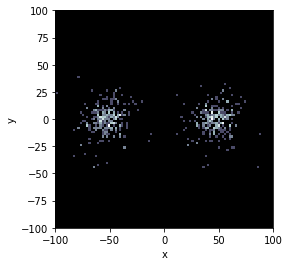

In [15]:
fig, ax = plt.subplots()
ax.set_aspect('equal')
ax.set_xlim((-100, 100))
ax.set_ylim((-100, 100))
ax.set_xlabel('x'), ax.set_ylabel('y')
data, x, y = np.histogram2d(pos_full[:,0], pos_full[:,1], bins=np.linspace(-100, 100, 200))
data[data <= 0.] = 1e-10
im = plt.imshow(data.T, interpolation = 'None', origin = 'lower', cmap='bone', norm=mpl.colors.LogNorm(vmin=1., clip=False),  extent=(-200, 200, -200, 200))

In [16]:
#Define animation. 
def animate_data(i) :
    dt = 0.02
    T = i * dt
    fname = '../results/merger_576-12_2000_5000_50/step_{:d}.dat'.format(i)
    data = np.loadtxt(fname)
    with open(fname, 'r') as f:
        t = f.readlines()[4].split(': ')[-1].split(' ')[-1].split('.')[0]
    X = data[:, 0]
    Y = data[:, 1]
    data,x,y = np.histogram2d(X, Y, bins=np.linspace(-100, 100, 200))
    data[data <= 0.] = 1e-10
    im.set_data(data.T)
    est_time = t_start + timedelta(seconds=28.*i)
    ax.set_title('{:d} Steps, {:.2f} Myr, {:s}'.format(i, T, t))
    return im

In [21]:
import os
i_max = 0
for i in range(0, 5000, 10):
    if not os.path.exists('../results/merger_576-12_2000_5000_50/step_{:d}.dat'.format(i)):
        i_max = i - 10
        break
print(i_max)

520


In [22]:
# call the animator.
anim = animation.FuncAnimation(fig, animate_data,
                               frames=np.arange(0, i_max+1, 10), interval=100, blit=False)
anim

In [13]:
anim.save('merger_small.mp4')